In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
# no NAs
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
X = df[["age", "chol"]]
y = df["diagnosis"]

In [ ]:
log_pipeline = Pipeline(
  [("log_regression", LogisticRegression())]
)

In [ ]:
# Fit the model on data
log_pipeline_fitted = log_pipeline.fit(X, y)

# to see coefficients
log_coef = log_pipeline_fitted.named_steps['log_regression'].coef_
log_intercept = log_pipeline_fitted.named_steps['log_regression'].intercept_

print(log_coef), print(log_intercept)

[[0.04686331 0.00180124]]
[-3.24011226]


(None, None)

zi= 0.047(age) + 0.001(chol) - 3.24

0 = 0.047(55) + 0.001(chol) - 3.24
- chol = 655
(-(age stuff)+3.24) / 0.001 = chol

zi=ln(0.9/(1-0.9))= 2.19722457734

2.19722457734 = 0.047(55) + 0.001(chol) - 3.24
- chol = 2852.22

more postive, more sure of Category 1; more negative, more sure of Category 0.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
LDA_pipeline = Pipeline(
  [("LDA", LinearDiscriminantAnalysis())]
)

In [ ]:
# Fit the model on data
LDA_pipeline_fitted = LDA_pipeline.fit(X, y)

# to see coefficients
LDA_coef = LDA_pipeline_fitted.named_steps['LDA'].coef_
LDA_intercept = LDA_pipeline_fitted.named_steps['LDA'].intercept_

print(LDA_coef), print(LDA_intercept)

[[0.04655744 0.00178967]]
[-3.21967766]


(None, None)

zi = 0.0466(age) + 0.00179(chol) - 3.22

0 = 0.0466(55) + 0.00179(chol) - 3.22
- chol = 367.04

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
SVC_pipeline = Pipeline(
  [("SVC", SVC())]
)

In [ ]:
# Tuning
# C is the regularization parameter
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param = {
    'SVC__C': np.logspace(-4, 4, 20),
}

# Define GridSearchCV
gscv = GridSearchCV(SVC_pipeline, param, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object
gscv_fitted = gscv.fit(X, y)

# Get the best score and the best parameters
best_score = gscv_fitted.best_score_
best_params = gscv_fitted.best_params_

best_score, best_params

(0.6249786871270248, {'SVC__C': 0.012742749857031334})

In [ ]:
SVC_pipeline1 = Pipeline(
  [("SVC", SVC(C=0.012742749857031334, kernel='linear'))]
)

In [ ]:
# Fit the model on data
SVC_pipeline1_fitted = SVC_pipeline1.fit(X, y)

# to see coefficients
SVC_coef = SVC_pipeline1_fitted.named_steps['SVC'].coef_
SVC_intercept = SVC_pipeline1_fitted.named_steps['SVC'].intercept_

print(SVC_coef), print(SVC_intercept)

[[0.06439814 0.0036576 ]]
[-4.68565792]


(None, None)

zi = 0.064(age) + 0.00379(chol) - 4.69

0 = 0.064(55) + 0.00379(chol) - 4.69

- chol = 308.71

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

0 = age_coef(age) + chol_coef(chol) - intercept

y = mx + b transformation

slope = -age_coef/chol_coef

intercept = -intercept/chol_coef

In [ ]:
# Log
slope_log = -log_pipeline_fitted.named_steps['log_regression'].coef_[0][0] / log_pipeline_fitted.named_steps['log_regression'].coef_[0][1]

intercept_log = -log_pipeline_fitted.named_steps['log_regression'].intercept_[0] / log_pipeline_fitted.named_steps['log_regression'].coef_[0][1]

In [ ]:
# LDA
slope_LDA = -LDA_pipeline_fitted.named_steps['LDA'].coef_[0][0] / LDA_pipeline_fitted.named_steps['LDA'].coef_[0][1]

intercept_LDA = -LDA_pipeline_fitted.named_steps['LDA'].intercept_[0] / LDA_pipeline_fitted.named_steps['LDA'].coef_[0][1]

In [ ]:
# SVC
slope_SVC = -SVC_pipeline1_fitted.named_steps['SVC'].coef_[0][0] / SVC_pipeline1_fitted.named_steps['SVC'].coef_[0][1]

intercept_SVC = -SVC_pipeline1_fitted.named_steps['SVC'].intercept_[0] / SVC_pipeline1_fitted.named_steps['SVC'].coef_[0][1]

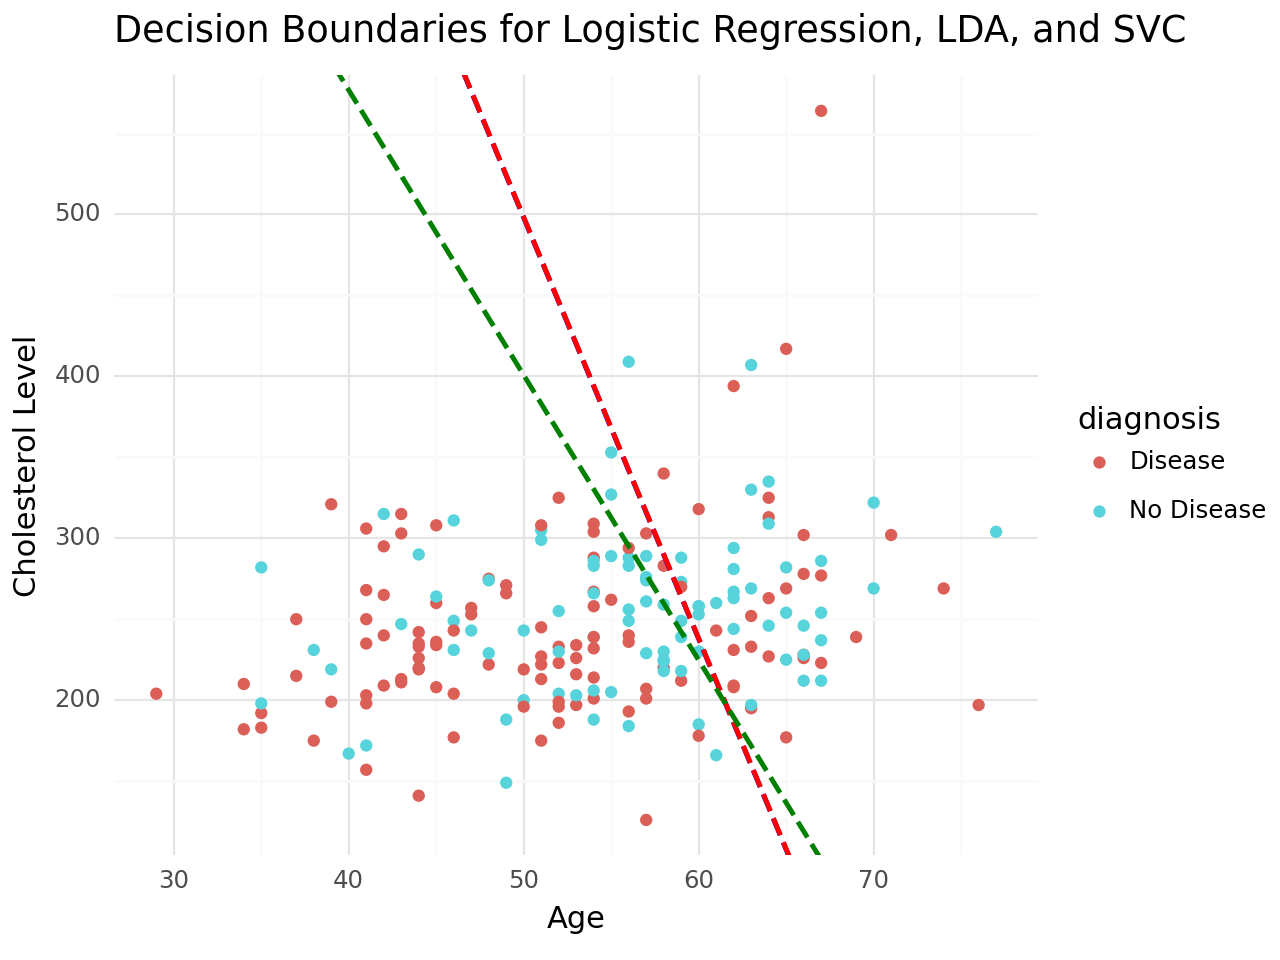

<Figure Size: (640 x 480)>

In [ ]:
# The Plot
from plotnine import *

p = (ggplot(df, aes(x='age', y='chol', color='diagnosis'))
     + geom_point()
     + geom_abline(intercept=intercept_log, slope=slope_log, linetype='dashed', color='blue', size=1)
     + geom_abline(intercept=intercept_LDA, slope=slope_LDA, color='red', linetype='dashed', size=1)
     + geom_abline(intercept=intercept_SVC, slope=slope_SVC, color='green', linetype='dashed', size=1)
     + labs(title="Decision Boundaries for Logistic Regression, LDA, and SVC", x="Age", y="Cholesterol Level")
     + theme_minimal()
)
p
